In [1]:
import numpy as np
import pandas as pd
import tcbench as tcb
from functions import (build_faiss, 
                       search_faiss_per_class, 
                       extract_results_per_class,
                       extract_results_per_class_splits_avg,
                       plot_results_per_class)

In [2]:
vectors_baseline = np.load('artifacts-mirage19/baseline_vectors.npy')
labels_baseline = np.load('artifacts-mirage19/baseline_labels.npy')
vectors_embeddings = np.load('artifacts-mirage19/embeddings_vectors.npy')
labels_embeddings = np.load('artifacts-mirage19/embeddings_labels.npy')

In [3]:
df_split = tcb.load_parquet(tcb.DATASETS.MIRAGE19, min_pkts=10, split=True)
train_val_indices = np.concatenate([df_split.iloc[0][0], df_split.iloc[0][1]])
test_indices = df_split.iloc[0][2]

In [4]:
index_baseline, selected_indices_baseline = build_faiss(vectors_baseline, labels_baseline, train_val_indices, 'euclidean', None)
per_class_metrics_baseline = search_faiss_per_class(vectors_baseline, labels_baseline, test_indices, selected_indices_baseline, index_baseline, "distance", None)
print("Baseline - Coverage (%) for all classes: 100.0")
print("Baseline - Accuracy (%) for all classes:", per_class_metrics_baseline[-1]['match_percentage'])

for i in range(20):
    print("Baseline - Accuracy (%) for Class", i, ":", per_class_metrics_baseline[i]['match_percentage'])

Baseline - Coverage (%) for all classes: 100.0
Baseline - Accuracy (%) for all classes: 64.08538485509504
Baseline - Accuracy (%) for Class 0 : 63.91184573002755
Baseline - Accuracy (%) for Class 1 : 72.51908396946564
Baseline - Accuracy (%) for Class 2 : 39.183673469387756
Baseline - Accuracy (%) for Class 3 : 36.09756097560975
Baseline - Accuracy (%) for Class 4 : 42.73504273504273
Baseline - Accuracy (%) for Class 5 : 59.893048128342244
Baseline - Accuracy (%) for Class 6 : 90.29126213592234
Baseline - Accuracy (%) for Class 7 : 65.06550218340611
Baseline - Accuracy (%) for Class 8 : 45.06172839506173
Baseline - Accuracy (%) for Class 9 : 54.861111111111114
Baseline - Accuracy (%) for Class 10 : 67.11051930758988
Baseline - Accuracy (%) for Class 11 : 60.93023255813953
Baseline - Accuracy (%) for Class 12 : 60.1123595505618
Baseline - Accuracy (%) for Class 13 : 62.695924764890286
Baseline - Accuracy (%) for Class 14 : 52.313167259786475
Baseline - Accuracy (%) for Class 15 : 71.428

In [5]:
index_embeddings, selected_indices_embeddings = build_faiss(vectors_embeddings, labels_embeddings, train_val_indices, 'euclidean', None)
per_class_metrics_embeddings = search_faiss_per_class(vectors_embeddings, labels_embeddings, test_indices, selected_indices_embeddings, index_embeddings, "distance", None)
print("Embeddings - Coverage (%) for all classes: 100.0")
print("Embeddings - Accuracy (%) for all classes:", per_class_metrics_embeddings[-1]['match_percentage'])

for i in range(20):
    print("Embeddings - Accuracy (%) for Class", i, ":", per_class_metrics_embeddings[i]['match_percentage'])

Embeddings - Coverage (%) for all classes: 100.0
Embeddings - Accuracy (%) for all classes: 79.38610158928014
Embeddings - Accuracy (%) for Class 0 : 80.4093567251462
Embeddings - Accuracy (%) for Class 1 : 82.84182305630027
Embeddings - Accuracy (%) for Class 2 : 68.53448275862068
Embeddings - Accuracy (%) for Class 3 : 63.1578947368421
Embeddings - Accuracy (%) for Class 4 : 58.333333333333336
Embeddings - Accuracy (%) for Class 5 : 80.0
Embeddings - Accuracy (%) for Class 6 : 96.84931506849314
Embeddings - Accuracy (%) for Class 7 : 83.97291196388262
Embeddings - Accuracy (%) for Class 8 : 67.48466257668711
Embeddings - Accuracy (%) for Class 9 : 71.95571955719558
Embeddings - Accuracy (%) for Class 10 : 86.26666666666667
Embeddings - Accuracy (%) for Class 11 : 78.75536480686695
Embeddings - Accuracy (%) for Class 12 : 73.62637362637363
Embeddings - Accuracy (%) for Class 13 : 75.48387096774194
Embeddings - Accuracy (%) for Class 14 : 75.09293680297398
Embeddings - Accuracy (%) for

In [6]:
index_embeddings_cosine, selected_indices_embeddings_cosine = build_faiss(vectors_embeddings, labels_embeddings, train_val_indices, 'cosine', None)
per_class_embeddings_cosine = search_faiss_per_class(vectors_embeddings, labels_embeddings, test_indices, selected_indices_embeddings_cosine, index_embeddings_cosine, "similarity", None)
print("Embeddings Cosine - Coverage (%) for all classes: 100.0")
print("Embeddings Cosine - Accuracy (%) for all classes:", per_class_embeddings_cosine[-1]['match_percentage'])

for i in range(20):
    print("Embeddings Cosine - Accuracy (%) for Class", i, ":", per_class_embeddings_cosine[i]['match_percentage'])

Embeddings Cosine - Coverage (%) for all classes: 100.0
Embeddings Cosine - Accuracy (%) for all classes: 80.91305702711125
Embeddings Cosine - Accuracy (%) for Class 0 : 81.28654970760235
Embeddings Cosine - Accuracy (%) for Class 1 : 83.91420911528151
Embeddings Cosine - Accuracy (%) for Class 2 : 71.55172413793103
Embeddings Cosine - Accuracy (%) for Class 3 : 65.07177033492823
Embeddings Cosine - Accuracy (%) for Class 4 : 60.83333333333333
Embeddings Cosine - Accuracy (%) for Class 5 : 81.06666666666666
Embeddings Cosine - Accuracy (%) for Class 6 : 97.26027397260275
Embeddings Cosine - Accuracy (%) for Class 7 : 85.55304740406321
Embeddings Cosine - Accuracy (%) for Class 8 : 71.77914110429448
Embeddings Cosine - Accuracy (%) for Class 9 : 74.53874538745387
Embeddings Cosine - Accuracy (%) for Class 10 : 87.06666666666666
Embeddings Cosine - Accuracy (%) for Class 11 : 79.6137339055794
Embeddings Cosine - Accuracy (%) for Class 12 : 76.92307692307693
Embeddings Cosine - Accuracy 

In [7]:
samples = [10, 100, 1000]

distances_baseline = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3]
distances_embeddings = [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]
similarities = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 
                0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999]

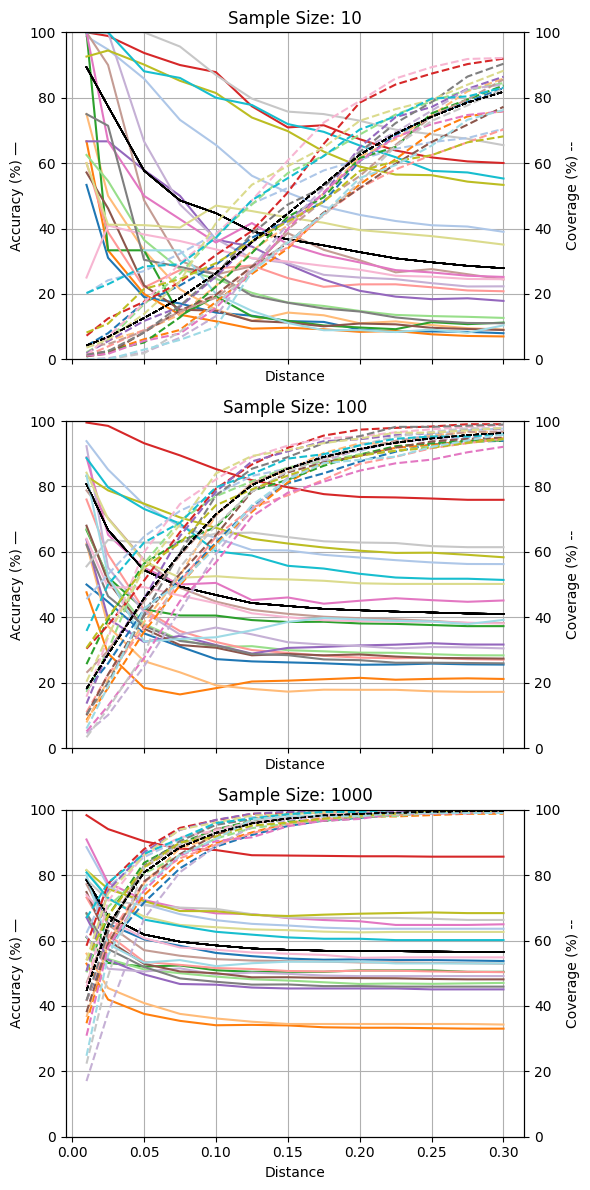

In [8]:
coverage_results_baseline_per_class, accuracy_results_baseline_per_class = extract_results_per_class(vectors_baseline, labels_baseline, train_val_indices, test_indices, 'euclidean', 'distance', samples, distances_baseline)
plot_results_per_class(coverage_results_baseline_per_class, accuracy_results_baseline_per_class, samples, distances_baseline)

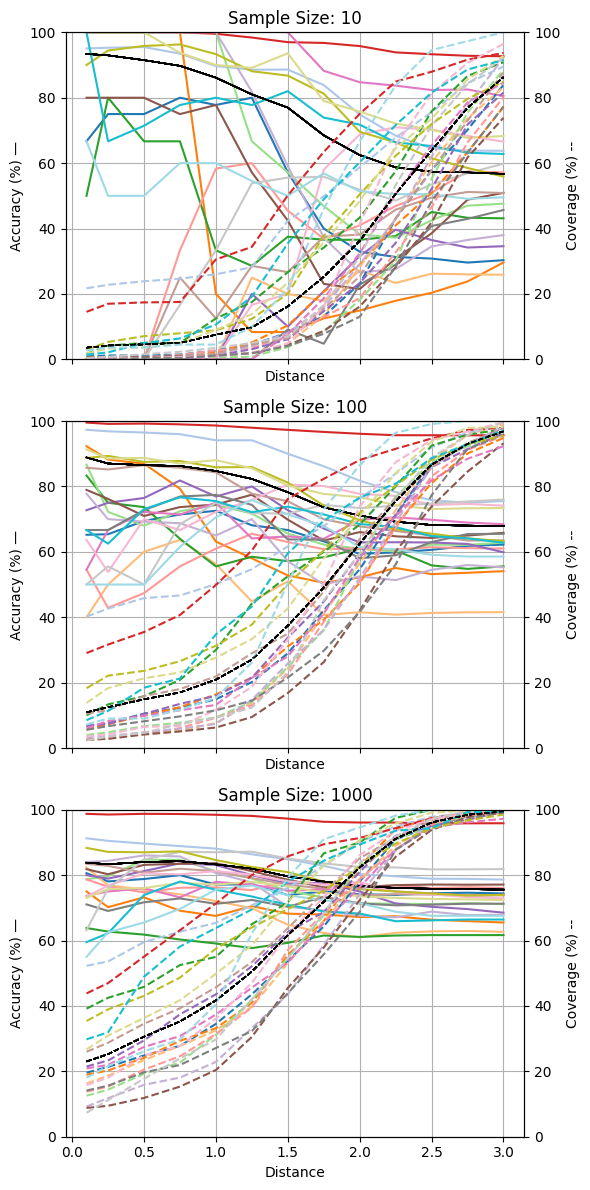

In [9]:
coverage_results_embeddings_per_class, accuracy_results_embeddings_per_class = extract_results_per_class(vectors_embeddings, labels_embeddings, train_val_indices, test_indices, 'euclidean', 'distance', samples, distances_embeddings)
plot_results_per_class(coverage_results_embeddings_per_class, accuracy_results_embeddings_per_class, samples, distances_embeddings)

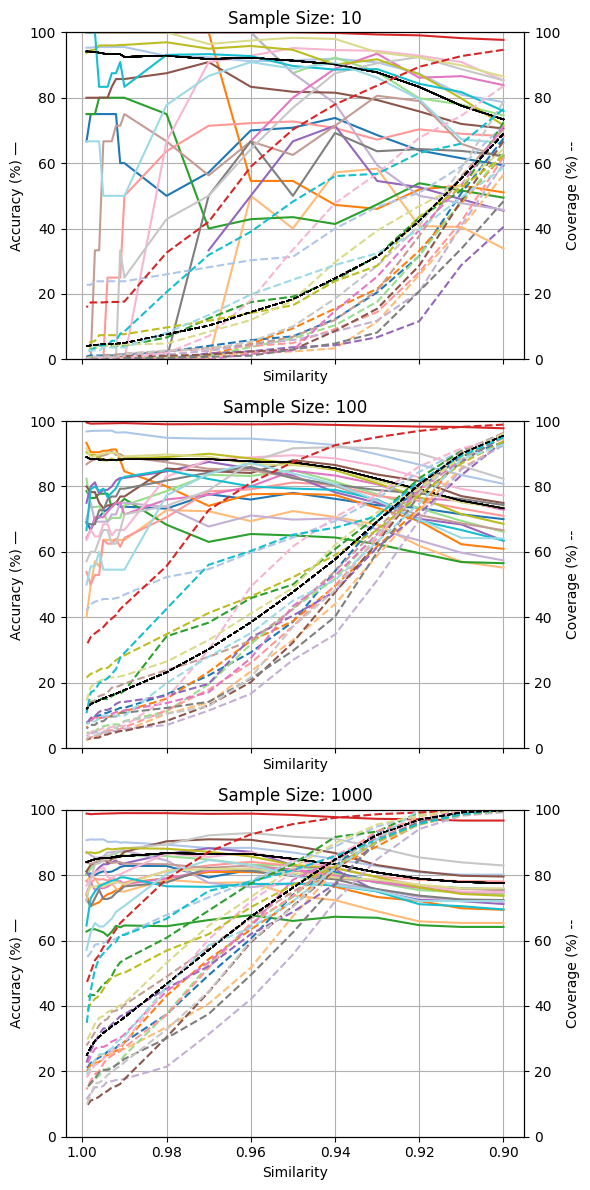

In [11]:
coverage_results_embeddings_cosine_per_class, accuracy_results_embeddings_cosine_per_class = extract_results_per_class(vectors_embeddings, labels_embeddings, train_val_indices, test_indices, 'cosine', 'similarity', samples, similarities)
plot_results_per_class(coverage_results_embeddings_cosine_per_class, accuracy_results_embeddings_cosine_per_class, samples, similarities, reverse=True)

In [12]:
train_test_splits = [
    (np.concatenate([df_split.iloc[0][0], df_split.iloc[0][1]]), df_split.iloc[0][2]),
    (np.concatenate([df_split.iloc[1][0], df_split.iloc[1][1]]), df_split.iloc[1][2]),
    (np.concatenate([df_split.iloc[2][0], df_split.iloc[2][1]]), df_split.iloc[2][2]),
    (np.concatenate([df_split.iloc[3][0], df_split.iloc[3][1]]), df_split.iloc[3][2]),
    (np.concatenate([df_split.iloc[4][0], df_split.iloc[4][1]]), df_split.iloc[4][2])
]

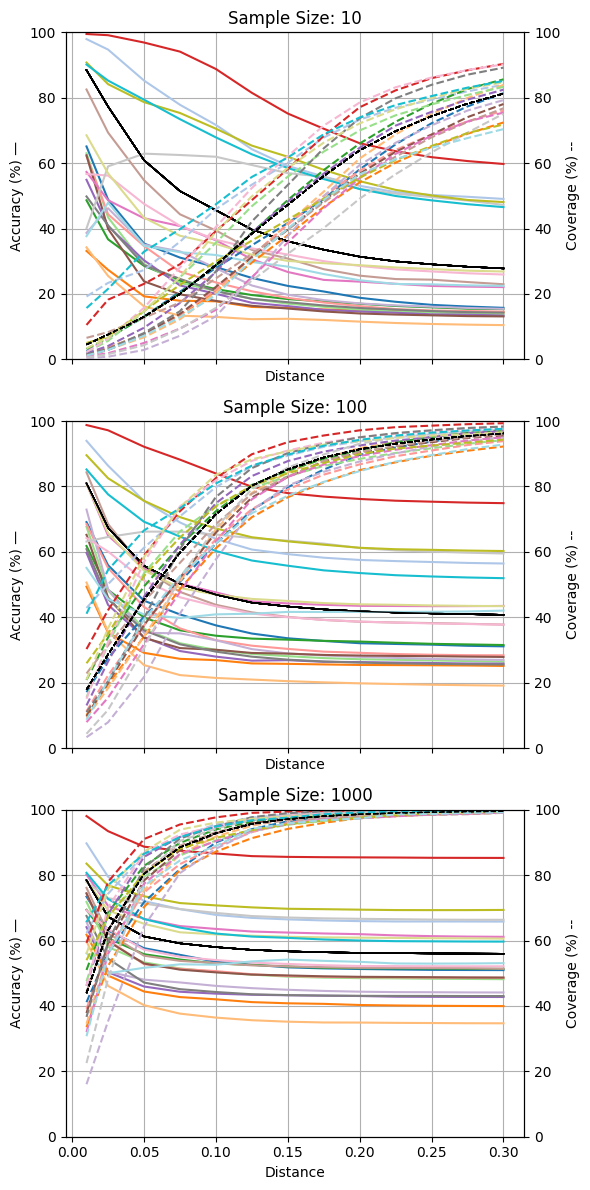

In [13]:
coverage_results_baseline_per_class_splits_avg, accuracy_results_baseline_per_class_splits_avg = extract_results_per_class_splits_avg(vectors_baseline, labels_baseline, train_test_splits, 'euclidean', 'distance', samples, distances_baseline)
plot_results_per_class(coverage_results_baseline_per_class_splits_avg, accuracy_results_baseline_per_class_splits_avg, samples, distances_baseline)

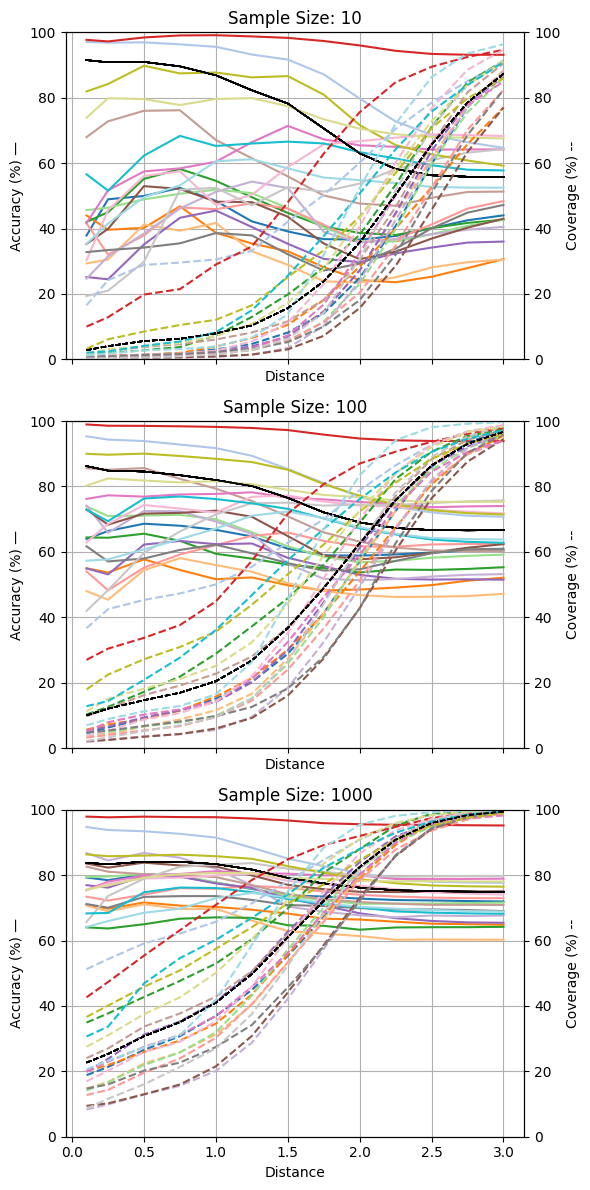

In [14]:
coverage_results_embeddings_per_class_splits_avg, accuracy_results_embeddings_per_class_splits_avg = extract_results_per_class_splits_avg(vectors_embeddings, labels_embeddings, train_test_splits, 'euclidean', 'distance', samples, distances_embeddings)
plot_results_per_class(coverage_results_embeddings_per_class_splits_avg, accuracy_results_embeddings_per_class_splits_avg, samples, distances_embeddings)

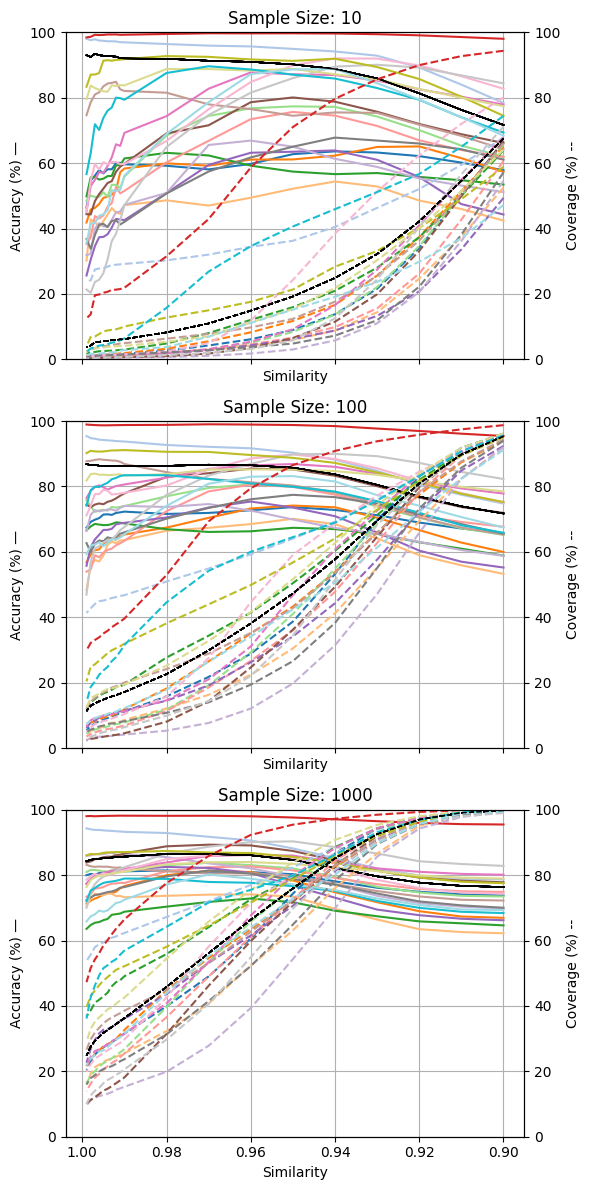

In [15]:
coverage_results_embeddings_cosine_per_class_splits_avg, accuracy_results_embeddings_cosine_per_class_splits_avg = extract_results_per_class_splits_avg(vectors_embeddings, labels_embeddings, train_test_splits, 'cosine', 'similarity', samples, similarities)
plot_results_per_class(coverage_results_embeddings_cosine_per_class_splits_avg, accuracy_results_embeddings_cosine_per_class_splits_avg, samples, similarities, reverse=True)

In [16]:
sample_size = 100

classes = sorted(coverage_results_embeddings_per_class_splits_avg[distances_embeddings[0]][sample_size].keys())
data = []

for class_label in classes:
    row = []
    for distance in distances_embeddings:
        coverage = coverage_results_embeddings_per_class_splits_avg[distance][sample_size].get(class_label, [0])[0]
        accuracy = accuracy_results_embeddings_per_class_splits_avg[distance][sample_size].get(class_label, [0])[0]
        row.append(f"Cov: {coverage:.2f}%\nAcc: {accuracy:.2f}%")
    data.append(row)

columns = [f"Distance_{d}" for d in distances_embeddings]
df = pd.DataFrame(data, columns=columns, index=[("Total" if c == -1 else f"Class_{c}") for c in classes])

df.style.set_properties(**{'text-align': 'left'}).set_table_styles([
    dict(selector='th', props=[('text-align', 'left')])
])

,Distance_0.1,Distance_0.25,Distance_0.5,Distance_0.75,Distance_1,Distance_1.25,Distance_1.5,Distance_1.75,Distance_2,Distance_2.25,Distance_2.5,Distance_2.75,Distance_3
Total,Cov: 9.98% Acc: 86.21%,Cov: 12.05% Acc: 84.84%,Cov: 14.63% Acc: 84.57%,Cov: 16.91% Acc: 83.43%,Cov: 20.44% Acc: 81.95%,Cov: 26.78% Acc: 80.14%,Cov: 36.75% Acc: 76.50%,Cov: 48.92% Acc: 72.06%,Cov: 62.56% Acc: 68.98%,Cov: 75.83% Acc: 67.30%,Cov: 86.44% Acc: 66.65%,Cov: 93.07% Acc: 66.57%,Cov: 96.70% Acc: 66.62%
Class_0,Cov: 4.52% Acc: 63.94%,Cov: 6.26% Acc: 66.37%,Cov: 8.95% Acc: 68.60%,Cov: 11.52% Acc: 67.98%,Cov: 15.14% Acc: 66.72%,Cov: 20.17% Acc: 64.69%,Cov: 28.82% Acc: 60.97%,Cov: 41.29% Acc: 58.95%,Cov: 57.13% Acc: 58.84%,Cov: 72.52% Acc: 59.20%,Cov: 86.04% Acc: 59.79%,Cov: 93.35% Acc: 60.41%,Cov: 97.33% Acc: 60.46%
Class_1,Cov: 36.65% Acc: 95.34%,Cov: 42.47% Acc: 94.32%,Cov: 45.30% Acc: 93.88%,Cov: 47.27% Acc: 92.80%,Cov: 50.03% Acc: 91.73%,Cov: 55.45% Acc: 89.38%,Cov: 62.81% Acc: 85.33%,Cov: 70.03% Acc: 81.01%,Cov: 78.85% Acc: 76.81%,Cov: 86.45% Acc: 73.74%,Cov: 92.75% Acc: 72.07%,Cov: 96.85% Acc: 71.04%,Cov: 98.59% Acc: 70.74%
Class_2,Cov: 5.60% Acc: 54.96%,Cov: 7.24% Acc: 53.68%,Cov: 8.89% Acc: 57.70%,Cov: 11.46% Acc: 54.45%,Cov: 15.75% Acc: 51.62%,Cov: 21.37% Acc: 52.17%,Cov: 30.09% Acc: 49.78%,Cov: 41.00% Acc: 48.18%,Cov: 53.97% Acc: 48.47%,Cov: 67.51% Acc: 49.07%,Cov: 80.66% Acc: 49.82%,Cov: 89.99% Acc: 51.17%,Cov: 95.52% Acc: 52.09%
Class_3,Cov: 3.26% Acc: 47.99%,Cov: 4.20% Acc: 45.37%,Cov: 6.62% Acc: 54.39%,Cov: 8.75% Acc: 58.08%,Cov: 11.55% Acc: 55.93%,Cov: 16.60% Acc: 53.92%,Cov: 27.38% Acc: 50.40%,Cov: 41.24% Acc: 48.06%,Cov: 57.13% Acc: 46.78%,Cov: 72.53% Acc: 46.19%,Cov: 86.35% Acc: 46.27%,Cov: 94.95% Acc: 46.47%,Cov: 98.30% Acc: 47.17%
Class_4,Cov: 10.25% Acc: 64.40%,Cov: 12.59% Acc: 64.31%,Cov: 17.20% Acc: 65.55%,Cov: 21.83% Acc: 63.35%,Cov: 28.86% Acc: 59.40%,Cov: 37.21% Acc: 57.92%,Cov: 45.81% Acc: 56.07%,Cov: 56.15% Acc: 55.06%,Cov: 68.93% Acc: 53.69%,Cov: 82.27% Acc: 54.58%,Cov: 90.64% Acc: 54.47%,Cov: 95.49% Acc: 54.77%,Cov: 97.46% Acc: 55.29%
Class_5,Cov: 3.70% Acc: 73.93%,Cov: 4.88% Acc: 70.92%,Cov: 6.61% Acc: 71.10%,Cov: 7.88% Acc: 71.31%,Cov: 9.89% Acc: 69.95%,Cov: 15.21% Acc: 65.99%,Cov: 25.79% Acc: 61.66%,Cov: 40.03% Acc: 58.51%,Cov: 57.87% Acc: 56.79%,Cov: 74.29% Acc: 57.25%,Cov: 85.08% Acc: 58.20%,Cov: 91.76% Acc: 58.78%,Cov: 95.67% Acc: 59.14%
Class_6,Cov: 26.96% Acc: 98.96%,Cov: 30.39% Acc: 98.57%,Cov: 33.70% Acc: 98.52%,Cov: 37.61% Acc: 98.39%,Cov: 44.86% Acc: 98.22%,Cov: 57.24% Acc: 97.88%,Cov: 71.68% Acc: 97.23%,Cov: 80.71% Acc: 95.85%,Cov: 87.00% Acc: 94.65%,Cov: 90.64% Acc: 94.11%,Cov: 93.64% Acc: 93.91%,Cov: 96.12% Acc: 93.85%,Cov: 97.97% Acc: 93.86%
Class_7,Cov: 3.21% Acc: 53.99%,Cov: 3.97% Acc: 48.24%,Cov: 5.43% Acc: 55.19%,Cov: 6.69% Acc: 59.18%,Cov: 9.44% Acc: 62.06%,Cov: 14.47% Acc: 64.90%,Cov: 24.00% Acc: 65.89%,Cov: 36.60% Acc: 63.34%,Cov: 51.21% Acc: 61.70%,Cov: 67.46% Acc: 61.55%,Cov: 81.46% Acc: 62.25%,Cov: 89.77% Acc: 62.41%,Cov: 94.14% Acc: 62.41%
Class_8,Cov: 5.30% Acc: 54.93%,Cov: 6.54% Acc: 53.10%,Cov: 9.37% Acc: 62.23%,Cov: 11.53% Acc: 63.33%,Cov: 14.12% Acc: 62.33%,Cov: 20.08% Acc: 62.55%,Cov: 29.86% Acc: 58.16%,Cov: 44.62% Acc: 55.61%,Cov: 61.31% Acc: 52.95%,Cov: 75.69% Acc: 51.76%,Cov: 86.30% Acc: 51.52%,Cov: 92.27% Acc: 51.60%,Cov: 95.81% Acc: 51.48%


In [ ]:
sample_size = 100

classes = sorted(coverage_results_embeddings_cosine_per_class_splits_avg[similarities[0]][sample_size].keys())
data = []

for class_label in classes:
    row = []
    for similarity in similarities:
        coverage = coverage_results_embeddings_cosine_per_class_splits_avg[similarity][sample_size].get(class_label, [0])[0]
        accuracy = accuracy_results_embeddings_cosine_per_class_splits_avg[similarity][sample_size].get(class_label, [0])[0]
        row.append(f"Cov: {coverage:.2f}%\n Acc: {accuracy:.2f}%")
    data.append(row)

columns = [f"Similarity_{s}" for s in similarities]
df = pd.DataFrame(data, columns=columns, index=[("Total" if c == -1 else f"Class_{c}") for c in classes])

df.style.set_properties(**{'text-align': 'left'}).set_table_styles([
    dict(selector='th', props=[('text-align', 'left')])
])

,Similarity_0.9,Similarity_0.91,Similarity_0.92,Similarity_0.93,Similarity_0.94,Similarity_0.95,Similarity_0.96,Similarity_0.97,Similarity_0.98,Similarity_0.99,Similarity_0.991,Similarity_0.992,Similarity_0.993,Similarity_0.994,Similarity_0.995,Similarity_0.996,Similarity_0.997,Similarity_0.998,Similarity_0.999
Total,Cov: 95.36% Acc: 71.72%,Cov: 89.74% Acc: 73.90%,Cov: 80.92% Acc: 76.91%,Cov: 69.52% Acc: 80.48%,Cov: 57.72% Acc: 83.69%,Cov: 47.27% Acc: 85.73%,Cov: 38.11% Acc: 86.49%,Cov: 29.86% Acc: 86.66%,Cov: 22.59% Acc: 86.29%,Cov: 17.13% Acc: 86.27%,Cov: 16.64% Acc: 86.35%,Cov: 16.19% Acc: 86.31%,Cov: 15.78% Acc: 86.31%,Cov: 15.31% Acc: 86.29%,Cov: 14.81% Acc: 86.32%,Cov: 14.27% Acc: 86.34%,Cov: 13.64% Acc: 86.63%,Cov: 12.94% Acc: 86.53%,Cov: 11.33% Acc: 86.83%
Class_0,Cov: 96.15% Acc: 65.65%,Cov: 91.79% Acc: 67.14%,Cov: 83.12% Acc: 68.96%,Cov: 69.66% Acc: 71.20%,Cov: 53.23% Acc: 72.81%,Cov: 38.66% Acc: 73.69%,Cov: 28.84% Acc: 72.72%,Cov: 21.74% Acc: 71.90%,Cov: 15.80% Acc: 71.59%,Cov: 11.13% Acc: 72.30%,Cov: 10.67% Acc: 72.08%,Cov: 10.16% Acc: 71.89%,Cov: 9.67% Acc: 71.29%,Cov: 9.17% Acc: 71.48%,Cov: 8.64% Acc: 71.39%,Cov: 8.24% Acc: 70.31%,Cov: 7.52% Acc: 69.83%,Cov: 6.70% Acc: 69.18%,Cov: 5.43% Acc: 67.40%
Class_1,Cov: 95.10% Acc: 74.75%,Cov: 90.05% Acc: 77.46%,Cov: 83.50% Acc: 80.57%,Cov: 75.86% Acc: 84.76%,Cov: 69.25% Acc: 88.20%,Cov: 64.03% Acc: 90.32%,Cov: 59.21% Acc: 91.67%,Cov: 54.90% Acc: 92.12%,Cov: 50.92% Acc: 92.68%,Cov: 46.74% Acc: 93.74%,Cov: 46.51% Acc: 93.80%,Cov: 46.15% Acc: 93.88%,Cov: 45.88% Acc: 94.02%,Cov: 45.45% Acc: 94.10%,Cov: 45.09% Acc: 94.22%,Cov: 44.92% Acc: 94.31%,Cov: 44.07% Acc: 94.60%,Cov: 42.72% Acc: 94.76%,Cov: 41.30% Acc: 95.43%
Class_2,Cov: 94.16% Acc: 59.95%,Cov: 87.35% Acc: 62.83%,Cov: 77.50% Acc: 66.65%,Cov: 65.95% Acc: 70.40%,Cov: 53.84% Acc: 73.63%,Cov: 43.26% Acc: 74.15%,Cov: 35.05% Acc: 73.26%,Cov: 26.50% Acc: 70.40%,Cov: 18.19% Acc: 67.41%,Cov: 11.87% Acc: 65.30%,Cov: 10.98% Acc: 64.63%,Cov: 10.45% Acc: 63.71%,Cov: 9.93% Acc: 64.06%,Cov: 9.62% Acc: 63.36%,Cov: 9.30% Acc: 62.46%,Cov: 8.82% Acc: 60.75%,Cov: 8.22% Acc: 60.48%,Cov: 7.80% Acc: 59.15%,Cov: 6.52% Acc: 56.83%
Class_3,Cov: 92.02% Acc: 53.25%,Cov: 82.43% Acc: 55.87%,Cov: 69.46% Acc: 58.97%,Cov: 55.16% Acc: 64.11%,Cov: 41.23% Acc: 68.47%,Cov: 30.46% Acc: 70.11%,Cov: 22.38% Acc: 68.49%,Cov: 16.28% Acc: 67.34%,Cov: 12.10% Acc: 66.46%,Cov: 8.61% Acc: 63.62%,Cov: 8.01% Acc: 63.42%,Cov: 7.79% Acc: 62.68%,Cov: 7.70% Acc: 63.10%,Cov: 7.41% Acc: 62.19%,Cov: 6.64% Acc: 58.87%,Cov: 6.00% Acc: 57.06%,Cov: 5.70% Acc: 57.50%,Cov: 5.29% Acc: 55.82%,Cov: 3.51% Acc: 48.33%
Class_4,Cov: 96.13% Acc: 58.84%,Cov: 90.26% Acc: 60.97%,Cov: 82.04% Acc: 62.94%,Cov: 71.26% Acc: 65.49%,Cov: 60.32% Acc: 66.95%,Cov: 50.41% Acc: 67.35%,Cov: 41.41% Acc: 66.28%,Cov: 34.35% Acc: 66.08%,Cov: 27.68% Acc: 66.92%,Cov: 19.37% Acc: 68.68%,Cov: 18.91% Acc: 68.91%,Cov: 18.61% Acc: 69.01%,Cov: 17.81% Acc: 68.48%,Cov: 17.21% Acc: 68.19%,Cov: 16.67% Acc: 68.17%,Cov: 16.07% Acc: 68.35%,Cov: 14.98% Acc: 68.54%,Cov: 14.07% Acc: 67.77%,Cov: 11.77% Acc: 66.63%
Class_5,Cov: 95.62% Acc: 65.20%,Cov: 90.09% Acc: 67.20%,Cov: 80.83% Acc: 70.45%,Cov: 68.64% Acc: 73.86%,Cov: 54.88% Acc: 77.72%,Cov: 41.01% Acc: 79.99%,Cov: 29.26% Acc: 80.65%,Cov: 19.17% Acc: 79.55%,Cov: 11.75% Acc: 76.99%,Cov: 7.83% Acc: 74.00%,Cov: 7.51% Acc: 73.75%,Cov: 7.30% Acc: 73.51%,Cov: 6.98% Acc: 73.72%,Cov: 6.58% Acc: 72.60%,Cov: 6.33% Acc: 72.84%,Cov: 6.00% Acc: 72.70%,Cov: 5.64% Acc: 72.21%,Cov: 5.14% Acc: 73.96%,Cov: 4.37% Acc: 75.77%
Class_6,Cov: 98.74% Acc: 95.42%,Cov: 97.46% Acc: 96.14%,Cov: 95.81% Acc: 96.96%,Cov: 93.82% Acc: 97.70%,Cov: 90.87% Acc: 98.45%,Cov: 86.52% Acc: 98.79%,Cov: 79.44% Acc: 98.93%,Cov: 69.31% Acc: 99.01%,Cov: 52.91% Acc: 98.83%,Cov: 39.59% Acc: 98.79%,Cov: 38.64% Acc: 98.77%,Cov: 37.81% Acc: 98.75%,Cov: 36.94% Acc: 98.72%,Cov: 35.85% Acc: 98.69%,Cov: 35.01% Acc: 98.69%,Cov: 33.85% Acc: 98.71%,Cov: 33.04% Acc: 98.77%,Cov: 32.16% Acc: 98.84%,Cov: 29.85% Acc: 98.94%
Class_7,Cov

: 